In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
Glass_ds = pd.read_csv(r"D:\Data Science\Glass Identification\Glass Identification (1).csv")
Glass_ds

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
Glass_ds.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type '],
      dtype='object')

In [10]:
Glass_ds.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [11]:
Glass_ds.tail()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
Glass_ds.shape

(214, 11)

In [7]:
Glass_ds.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
Glass_ds.isnull().sum()

Id number    0
RI           0
Na           0
Mg           0
Al           0
Si           0
K            0
Ca           0
Ba           0
Fe           0
Type         0
dtype: int64

In [ ]:
#check the null value using the heatmap

<Axes: >

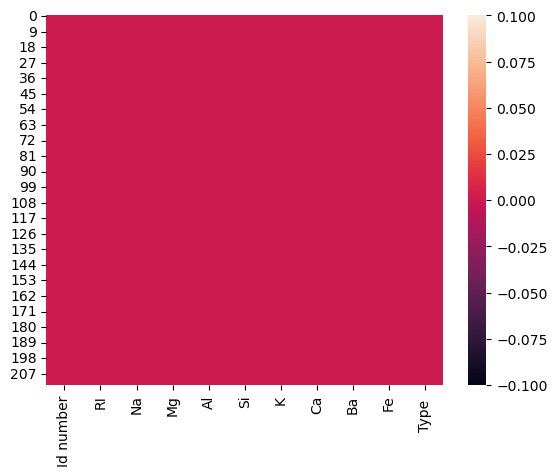

In [12]:
sns.heatmap(Glass_ds.isnull())

In [15]:
Glass_ds.value_counts()

Id number  RI       Na     Mg    Al    Si     K     Ca    Ba    Fe    Type 
1          1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00  1        1
135        1.51811  13.33  3.85  1.25  72.78  0.52  8.12  0.00  0.00  2        1
137        1.51806  13.00  3.80  1.08  73.07  0.56  8.38  0.00  0.12  2        1
138        1.51711  12.89  3.62  1.57  72.96  0.61  8.11  0.00  0.00  2        1
139        1.51674  12.79  3.52  1.54  73.36  0.66  7.90  0.00  0.00  2        1
                                                                              ..
75         1.51596  13.02  3.56  1.54  73.11  0.72  7.90  0.00  0.00  2        1
76         1.51590  13.02  3.58  1.51  73.12  0.69  7.96  0.00  0.00  2        1
77         1.51645  13.44  3.61  1.54  72.39  0.66  8.03  0.00  0.00  2        1
78         1.51627  13.00  3.58  1.54  72.83  0.61  8.04  0.00  0.00  2        1
214        1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00  7        1
Length: 214, dtype: int64

In [17]:
for i in Glass_ds.columns:
     print(Glass_ds[i].value_counts())
     print("\n")   

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id number, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58   

In [21]:
Glass_ds.dtypes

Id number      int64
RI           float64
Na           float64
Mg           float64
Al           float64
Si           float64
K            float64
Ca           float64
Ba           float64
Fe           float64
Type           int64
dtype: object

In [ ]:
#Type of Glass

In [22]:
Glass_ds.nunique().to_frame("no of unique values")

,no of unique values
Id number,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


<Figure size 600x600 with 0 Axes>

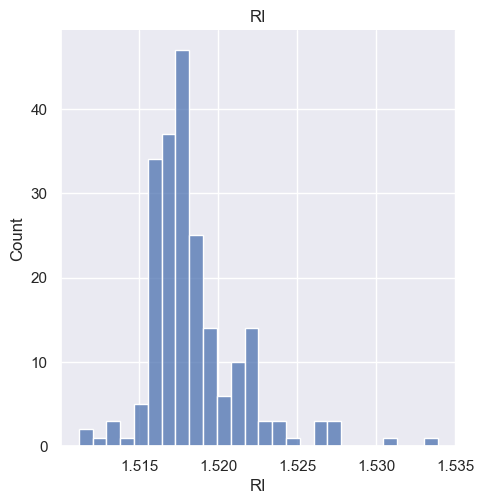

In [26]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(Glass_ds['RI'])
plt.title('RI')
plt.show()

<Figure size 600x600 with 0 Axes>

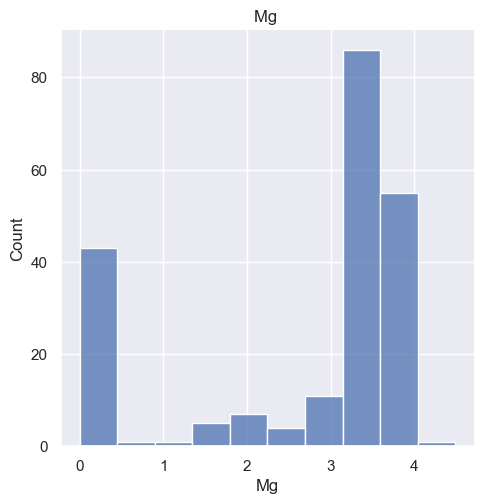

In [29]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(Glass_ds['Mg'])
plt.title('Mg ')
plt.show()

<Figure size 600x600 with 0 Axes>

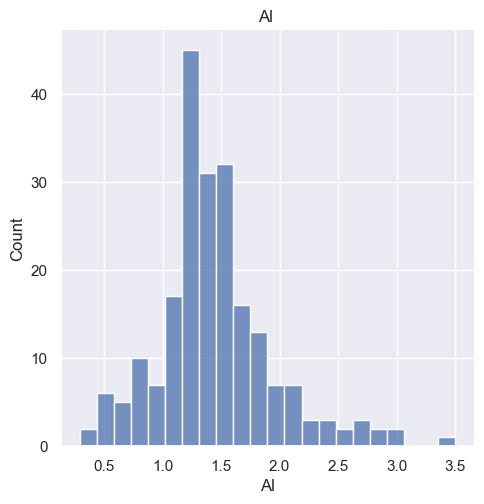

In [30]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(Glass_ds['Al'])
plt.title('Al ')
plt.show()

<Figure size 600x600 with 0 Axes>

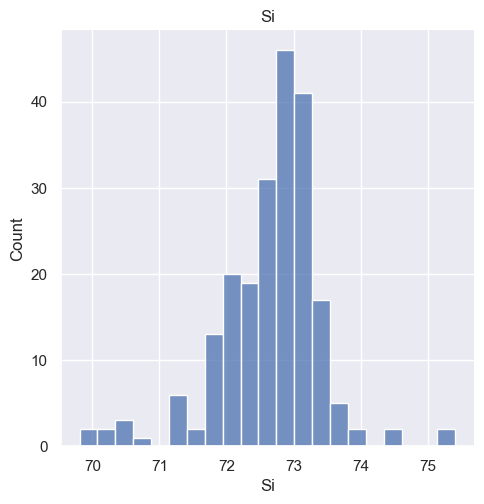

In [31]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(Glass_ds['Si'])
plt.title('Si')
plt.show()

<Figure size 600x600 with 0 Axes>

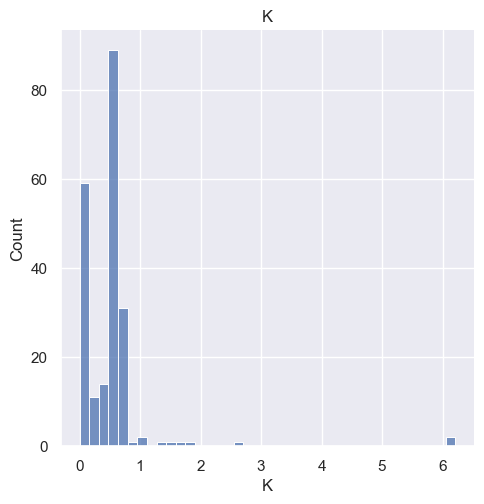

In [32]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(Glass_ds['K'])
plt.title('K')
plt.show()

<Figure size 600x600 with 0 Axes>

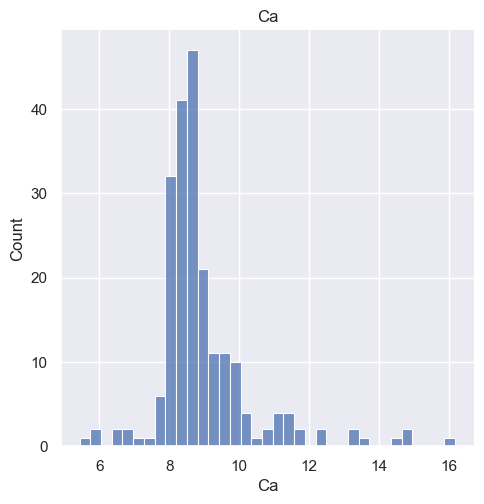

In [33]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(Glass_ds['Ca'])
plt.title('Ca')
plt.show()

<Figure size 600x600 with 0 Axes>

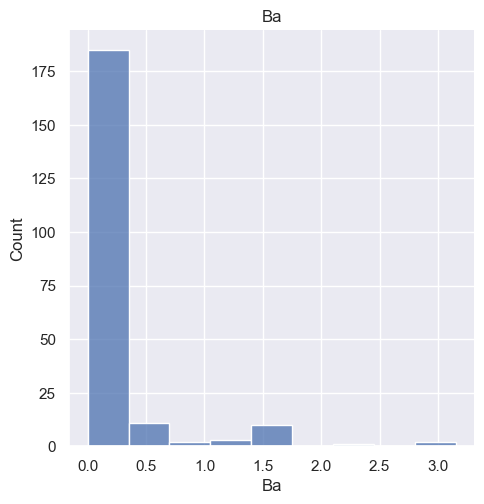

In [34]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(Glass_ds['Ba'])
plt.title('Ba')
plt.show()

<Figure size 600x600 with 0 Axes>

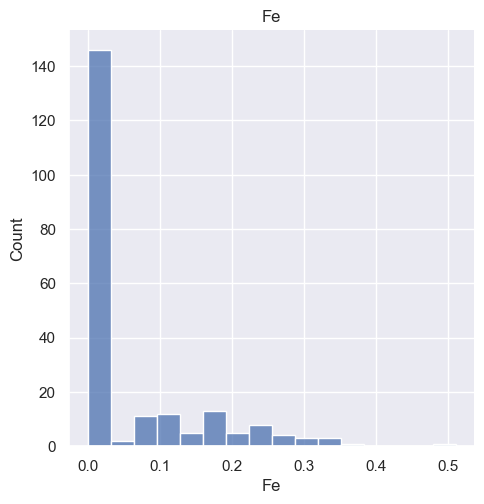

In [35]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(Glass_ds['Fe'])
plt.title('Fe')
plt.show()

In [39]:
X = Glass_ds.drop(columns= 'Type ', axis=1)
Y = Glass_ds['Type ']

In [40]:
print(X)

     Id number       RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0            1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1            2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2            3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3            4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4            5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..         ...      ...    ...   ...   ...    ...   ...   ...   ...  ...
209        210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210        211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211        212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212        213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213        214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 10 columns]


In [41]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type , Length: 214, dtype: int64


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2 , random_state=2 )

In [63]:
print(X.shape, X_train.shape, X_test.shape)

(214, 10) (171, 10) (43, 10)


In [44]:
regressor = LinearRegression()

In [45]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [46]:
training_data_predition =  regressor.predict(X_train)

In [76]:
training_data_predition =  regressor.predict(X_test)
res_test = metrics.r2_score(Y_test, training_data_predition)

In [77]:
print('R squard val', res_test)

R squard val 0.8826797226572448


In [78]:
input_data = (155,1.51694,12.86,3.58,1.31,72.61,0.61,8.79,0,0)

In [79]:
input_data_as_numpy_array = np.asarray(input_data)

In [80]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [81]:
prediction = regressor.predict(input_data_reshaped)
print(prediction)

[2.9518434]


C:\Users\milan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [82]:
print(prediction)

[2.9518434]


In [83]:
# Almost nearest 3, that means its window Glass 